## **Libraries**

In [38]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from io import StringIO

## Question 1

In [2]:
#reading data
data = pd.read_csv('/content/iris-with-errors.csv',
                   header = 0)
#(rows, columns)
print(data.shape)

#show head of the data
data.head()

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [3]:
#checking if there are nulls in the data
data.isnull().sum()

sepal_length    2
sepal_width     0
petal_length    0
petal_width     1
species         0
dtype: int64

In [4]:
#dropping the rows with NaN
data = data.dropna()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


In [5]:
#checking if data has duplicated rows
data.duplicated().sum()

5

In [6]:
#dropping duplicated rows
data = data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


In [7]:
#reindexing the data
data.reset_index(inplace=True, drop=True) #drop: doesn't add a index columns if True
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,?,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,5,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,duplicada
5,5,3.4,1.5,0.2,setosa
6,4.4,2.9,1.4,0.2,duplicada
7,4.9,3.1,1.5,0.1,setosa
8,5.4,3.7,1.5,0.2,setosa
9,4.8,3.4,1.6,0.2,setosa


In [14]:
#replacing '?' with NaN
data = data.replace('?', np.nan)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,NaN,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,5,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,duplicada
5,5,3.4,1.5,0.2,setosa
6,4.4,2.9,1.4,0.2,duplicada
7,4.9,3.1,1.5,0.1,setosa
8,5.4,3.7,1.5,0.2,setosa
9,4.8,3.4,1.6,0.2,setosa


In [15]:
data = data.dropna()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,4.7,3.2,1.3,0.2,setosa
3,5,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,duplicada
5,5,3.4,1.5,0.2,setosa
6,4.4,2.9,1.4,0.2,duplicada
7,4.9,3.1,1.5,0.1,setosa
8,5.4,3.7,1.5,0.2,setosa
9,4.8,3.4,1.6,0.2,setosa
10,4.8,3,1.4,0.1,setosa


In [16]:
#reindexing the data
data.reset_index(inplace=True, drop=True) #drop: doesn't add a index columns if True
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,4.7,3.2,1.3,0.2,setosa
2,5,3.6,1.4,0.2,setosa
3,5.4,3.9,1.7,0.4,duplicada
4,5,3.4,1.5,0.2,setosa
5,4.4,2.9,1.4,0.2,duplicada
6,4.9,3.1,1.5,0.1,setosa
7,5.4,3.7,1.5,0.2,setosa
8,4.8,3.4,1.6,0.2,setosa
9,4.8,3,1.4,0.1,setosa


In [17]:
# Dropping the last 2 columns
data = data.drop(data.columns[[-1,-2]], axis=1)
print(data.shape)
data

(14, 3)


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.7,3.2,1.3
2,5,3.6,1.4
3,5.4,3.9,1.7
4,5,3.4,1.5
5,4.4,2.9,1.4
6,4.9,3.1,1.5
7,5.4,3.7,1.5
8,4.8,3.4,1.6
9,4.8,3,1.4


## Question 2

In [18]:
data = pd.read_csv('/content/iris-with-errors.csv',
                   header = 0)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [19]:
data = data.replace('?', np.nan)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [20]:
data.duplicated().sum()

5

In [21]:
data = data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa


In [22]:
data.reset_index(inplace = True, drop = True)

In [23]:
# turning the data into a matrix
matrix = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
matrix

array([[5.1, 3.5, 1.4, 0.2],
       [nan, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [nan, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, nan],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, nan],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, nan, 1.7, 0.3],
       [nan, 3.8, 1.5, 0.3]])

In [24]:
averages = np.nanmean(matrix, axis = 0).round(2)
averages

array([5.06, 3.46, 1.43, 0.22])

In [25]:
for i in np.arange(0, matrix.shape[0]):
    for j in np.arange(0, matrix.shape[1]):
        if(np.isnan(matrix[i,j]) == True): # verificar se é uma entrada com Nan
            matrix[i,j] = averages[j] # insere a média
print(matrix)

[[5.1  3.5  1.4  0.2 ]
 [5.06 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.06 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.22]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.22]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.46 1.7  0.3 ]
 [5.06 3.8  1.5  0.3 ]]


In [26]:
data.dtypes

sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
species          object
dtype: object

In [27]:
data.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [28]:
for i in data.columns[:-1]:
  for j in range(0, len(data[i])):
    data[i][j] = float(data[i][j])
data

## Also works

## 1
# data.sepal_length = data.sepal_length.astype(float)
# data.sepal_width = data.sepal_width.astype(float)
# data.petal_length = data.petal_length.astype(float)
# data.petal_width = data.petal_width.astype(float)

## 2
# data['sepal_length'] = data['sepal_length'].astype(float)
# data['sepal_width'] = data['sepal_width'].astype(float)
# ...

<ipython-input-28-d5a666cc36bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = float(data[i][j])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,NaN,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,duplicada
6,4.6,3.4,1.4,NaN,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,duplicada
9,4.9,3.1,1.5,0.1,setosa


In [29]:
data.fillna(data.mean().round(2), inplace=True)
data

<ipython-input-29-39cfcf9f80ae>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean().round(2), inplace=True)
<ipython-input-29-39cfcf9f80ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean().round(2), inplace=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.4,0.20,duplicada
1,5.06,3.00,1.4,0.20,setosa
2,4.70,3.20,1.3,0.20,setosa
3,5.06,3.10,1.5,0.20,setosa
4,5.00,3.60,1.4,0.20,setosa
5,5.40,3.90,1.7,0.40,duplicada
6,4.60,3.40,1.4,0.22,setosa
7,5.00,3.40,1.5,0.20,setosa
8,4.40,2.90,1.4,0.20,duplicada
9,4.90,3.10,1.5,0.10,setosa


In [30]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 3

In [31]:
data = pd.read_csv('/content/iris.csv',
                   header = 0)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [33]:
data.duplicated().sum()

3

In [34]:
data = data.drop_duplicates()
data.reset_index(inplace = True, drop = True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,virginica
143,6.3,2.5,5.0,1.9,virginica
144,6.5,3.0,5.2,2.0,virginica
145,6.2,3.4,5.4,2.3,virginica


In [35]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
data.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

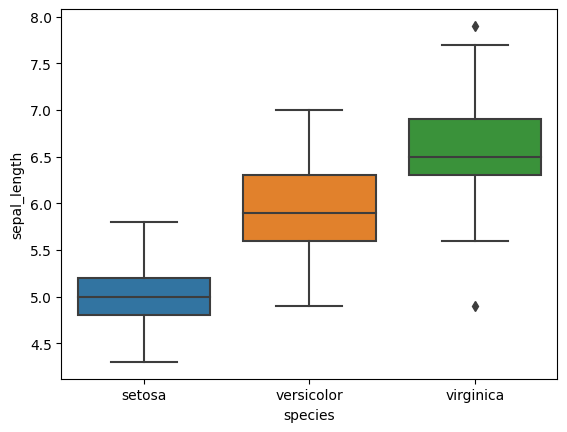

<Figure size 800x800 with 0 Axes>

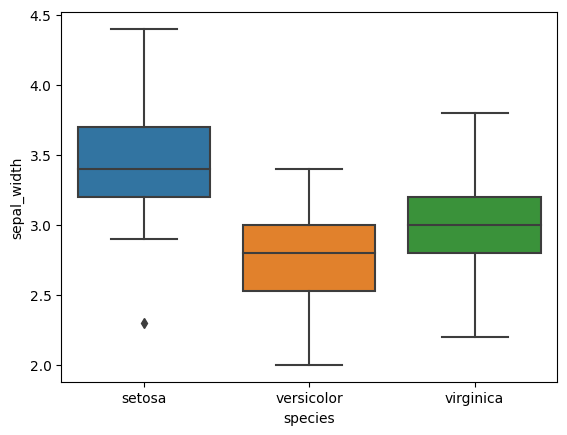

<Figure size 800x800 with 0 Axes>

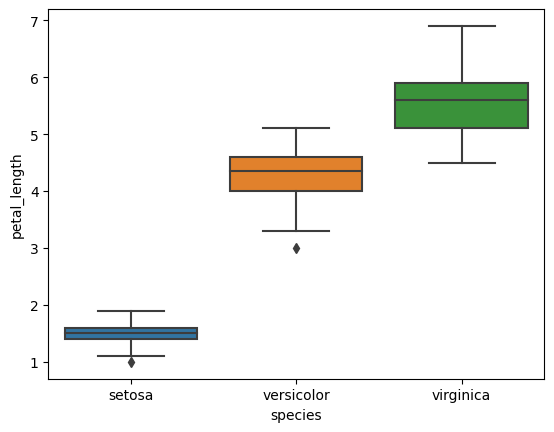

<Figure size 800x800 with 0 Axes>

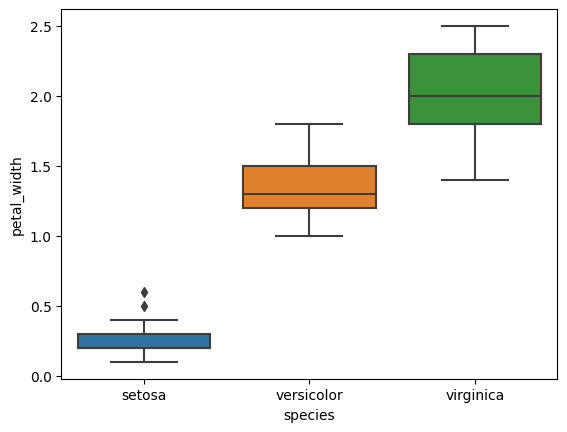

<Figure size 800x800 with 0 Axes>

In [37]:
for i in data.columns[:-1]:

  sns.boxplot(x = 'species', y = i, data = data)

  plt.figure(figsize = (8, 8))
  # plt.xlabel('Espécie', fontsize = 18)
  # plt.ylabel('Comprimento da pétala', fontsize = 16)
  # plt.xticks(fontsize = 14)
  # plt.yticks(fontsize = 14)

  plt.show(True)

## Question 4

In [42]:
# data base's URL - Kaggle
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

response = requests.get(url)
data = response.text

# Creating a DataFrame with the data base
df = pd.read_csv(StringIO(data), header = 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-63-0c209ef0d813>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-63-0c209ef0d813>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


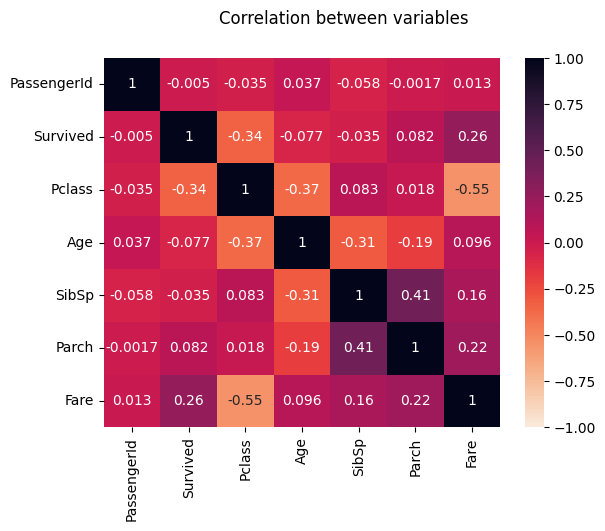

In [63]:
# Correlation matrix
corr = df.corr()

sns.heatmap(df.corr(),
            vmin = -1, vmax = 1,
            annot = True, #annot: if True, show the corr number
            cmap = 'rocket_r')

plt.suptitle('Correlation between variables', fontsize=12, fontweight='light')
# plt.grid() # default: True
plt.show()

## Other Way
# corr = df.corr()
# plt.figure(figsize=(7, 7))
# plt.imshow(corr, cmap='rocket_r', interpolation='none', aspect='auto')
# plt.colorbar()
# plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
# plt.yticks(range(len(corr)), corr.columns);
# plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
# plt.grid(False)
# plt.show()

In [64]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
